# Base para Sprint 2

- Usar incluir 4 variables explicativas (Buscamos velocidad)
- Mucho ojo a la calidad de los datos, el ingeniero de datos DEBE entregar una tabla maestra única, con datos correctos, en el tipo correcto y que representen el negocio.

In [ ]:
# !pip install -r requirements.tx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import ml_functions

# Pipeline

## Sprint 2

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
X['categorical_column'] = np.random.choice(['A', 'B', 'C'], X.shape[0])
y = data.target
X['mes'] = np.random.choice(['201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912'], X.shape[0])
pd.Series(y).value_counts()
X.head()

df = X
df['target'] = y
df.head()


import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [4]:
# df = read_table('sandbox', 'churn')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,C,201904,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,B,201902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,B,201910,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,C,201911,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,B,201910,0


La tabla debe tener todas las variables explicativas en su versión presente y 2fw

In [5]:
numerical_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
categorical_features = ['categorical_column']
month_feature = 'mes'
scoring_month = '201912' # df[month_feature].max()
validation_month = '201911' # df[df[month_feature] < scoring_month][month_feature].max()

In [6]:
df_adhoc = ml_functions.stratified_ad_hoc(df, categorical_features, 0.99)
print(df_adhoc.shape)

(563, 33)


Con las dos funciones siguientes el Ingeniero de datos debe garantizar:

- Que las variables categóricas no tengan alta cardinalidad
- Que los tipos de datos sean correctos
- Que las variables tengan sentido en el negocio
- Que las variables no tengan valores nulos excesivos ni ilógicos
- Que la distribución de las variables sea similar en los periodos, y si se ha rpesentado algún cambio sea producto de un cambio en el negocio y no de un error en la captura de datos.

In [24]:
ml_functions.descriptive(df_adhoc, 'target')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
train_df, validation_df, scoring_df, cv_df = ml_functions.cross_validation_sampling(df_adhoc, 'target', 5, 'roc_auc', month_feature, scoring_month, validation_month)
train_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
488,11.680,16.17,75.49,420.5,0.1128,0.09263,0.04279,0.031320,0.1853,0.06401,...,549.8,0.1526,0.1477,0.14900,0.09815,0.2804,0.08024,B,201906,1
121,18.660,17.12,121.40,1077.0,0.1054,0.11000,0.14570,0.086650,0.1966,0.06213,...,1549.0,0.1503,0.2291,0.32720,0.16740,0.2894,0.08456,A,201908,0
61,8.598,20.98,54.66,221.8,0.1243,0.08963,0.03000,0.009259,0.1828,0.06757,...,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712,A,201910,1
194,14.860,23.21,100.40,671.4,0.1044,0.19800,0.16970,0.088780,0.1737,0.06672,...,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,B,201908,0
432,20.180,19.54,133.80,1250.0,0.1133,0.14890,0.21330,0.125900,0.1724,0.06053,...,1479.0,0.1665,0.2942,0.53080,0.21730,0.3032,0.08075,A,201904,0


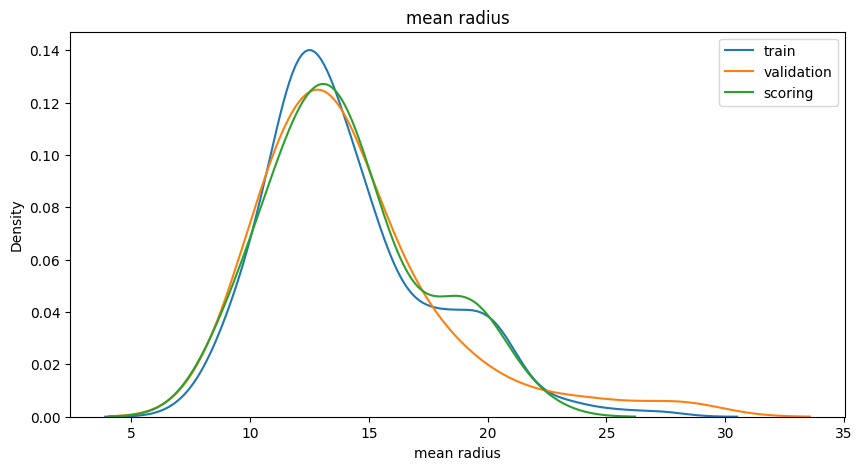

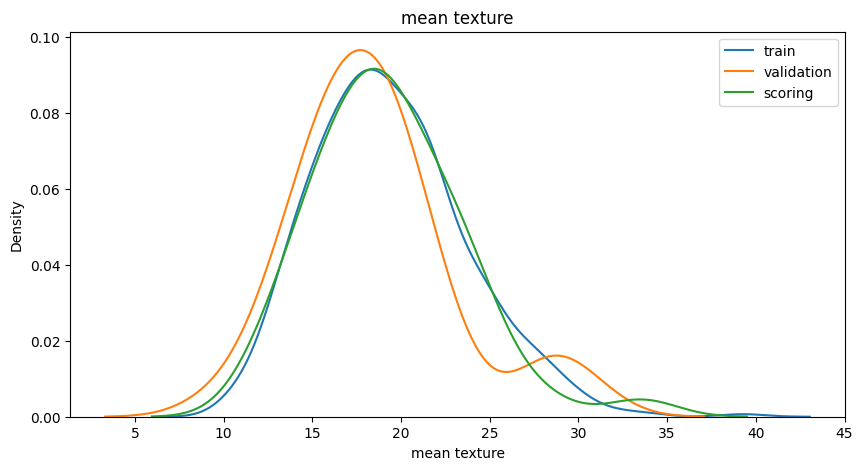

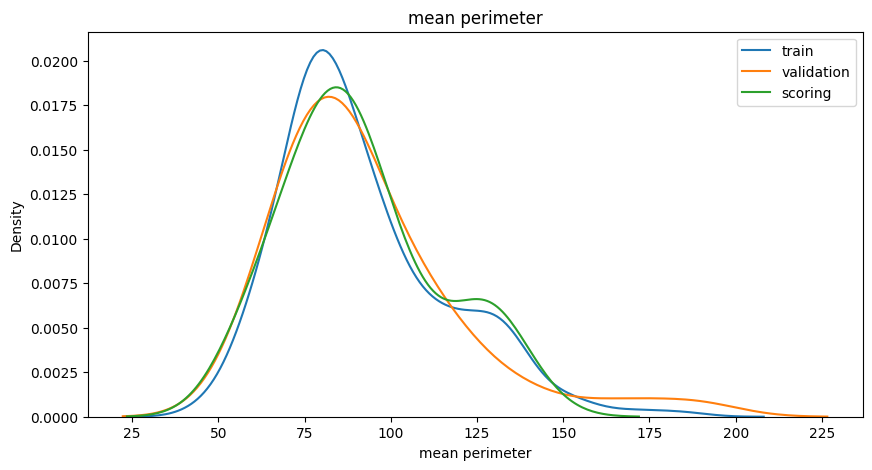

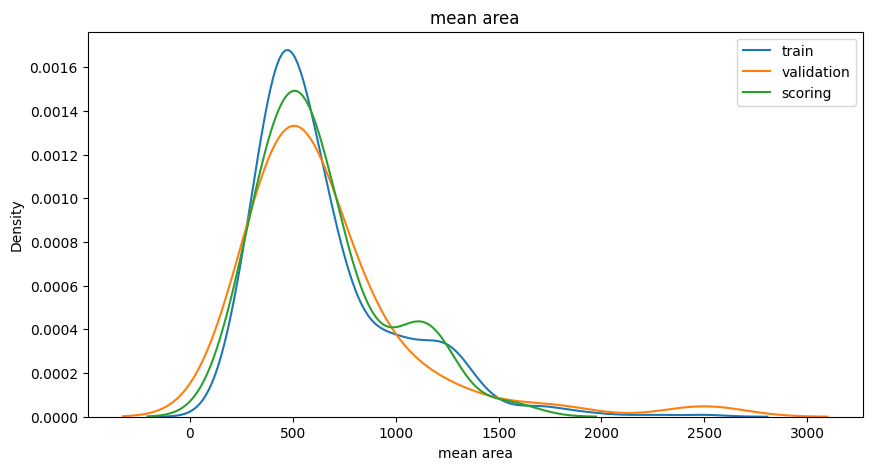

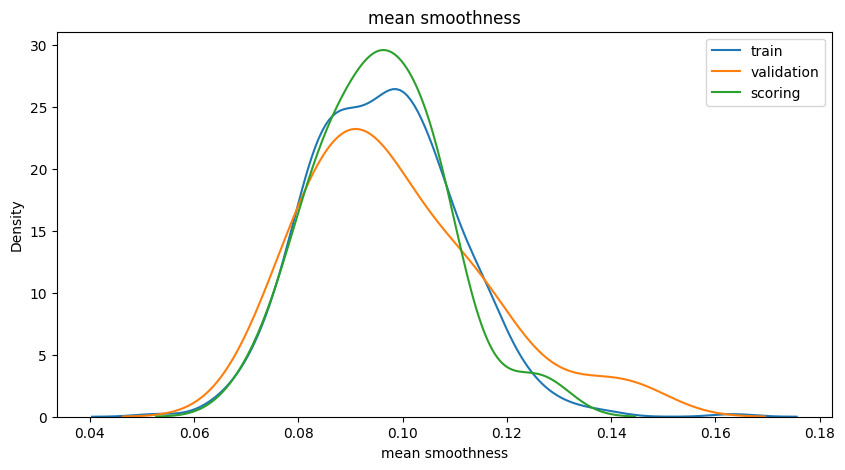

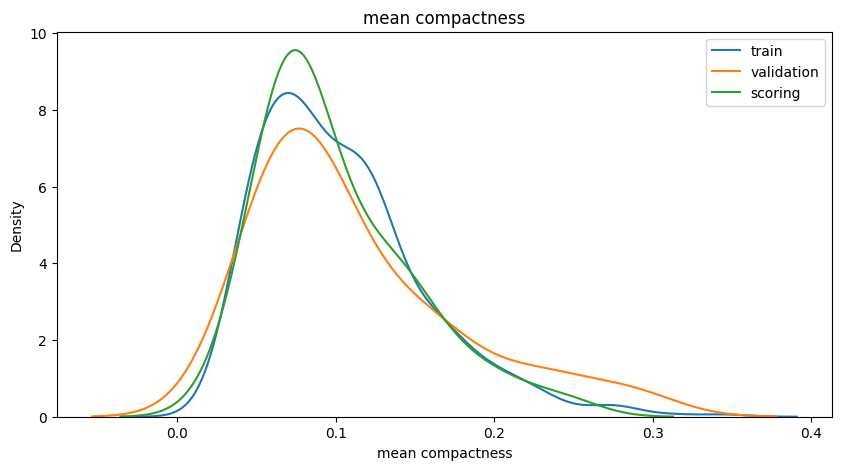

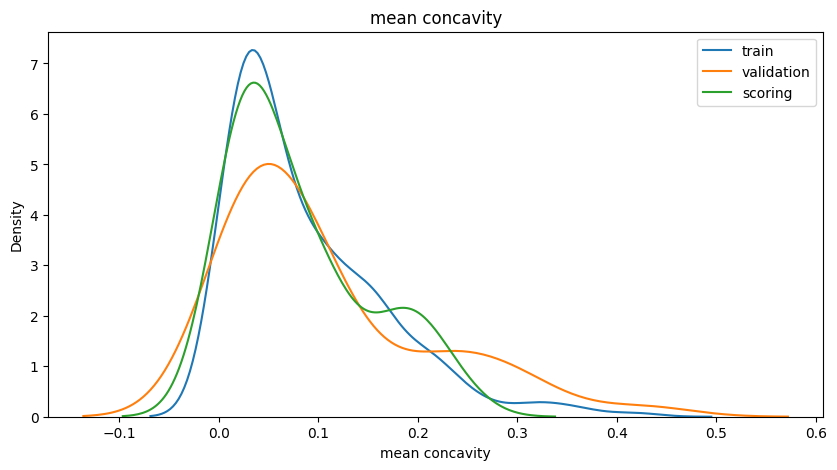

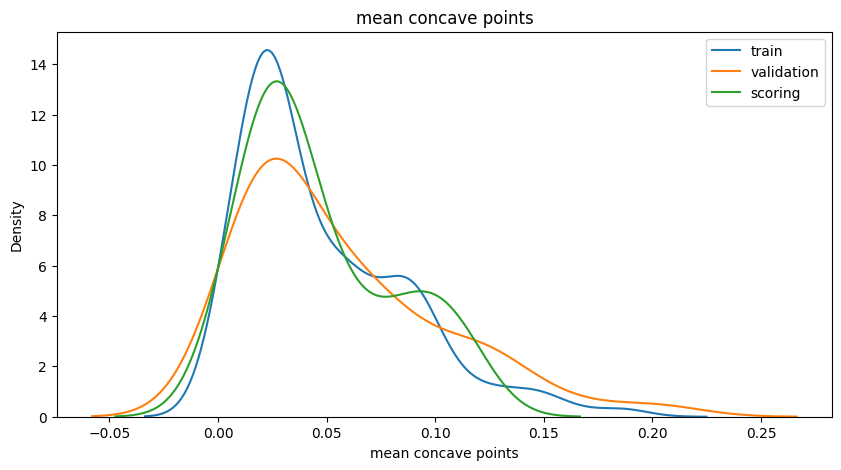

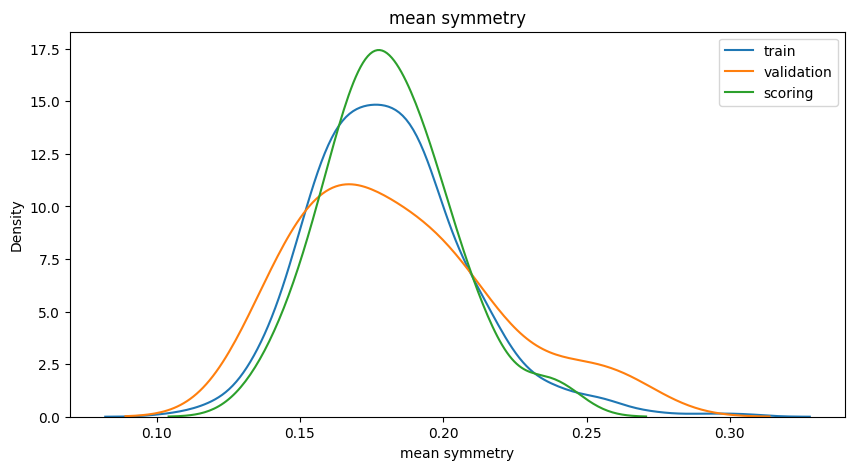

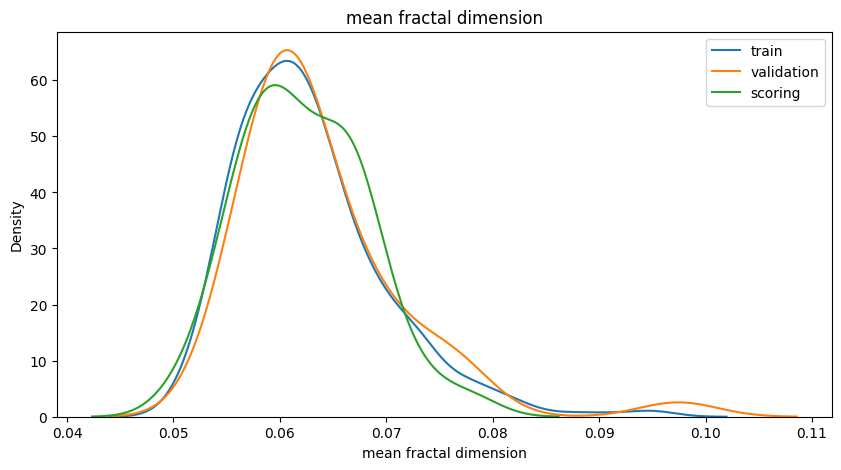

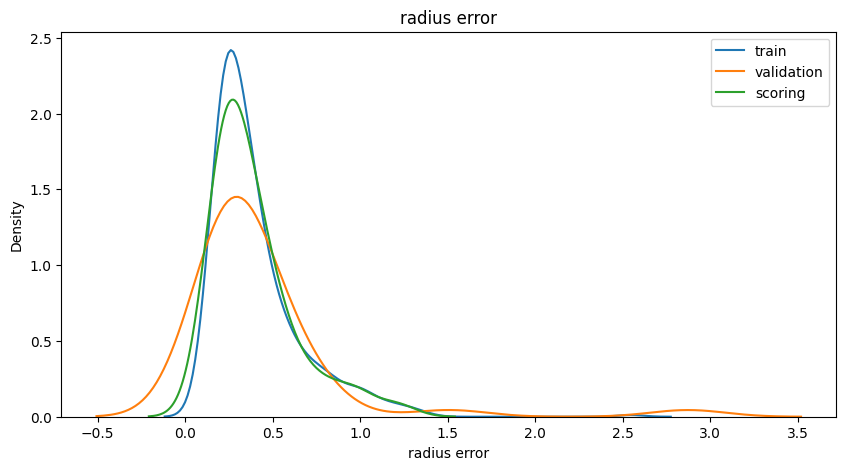

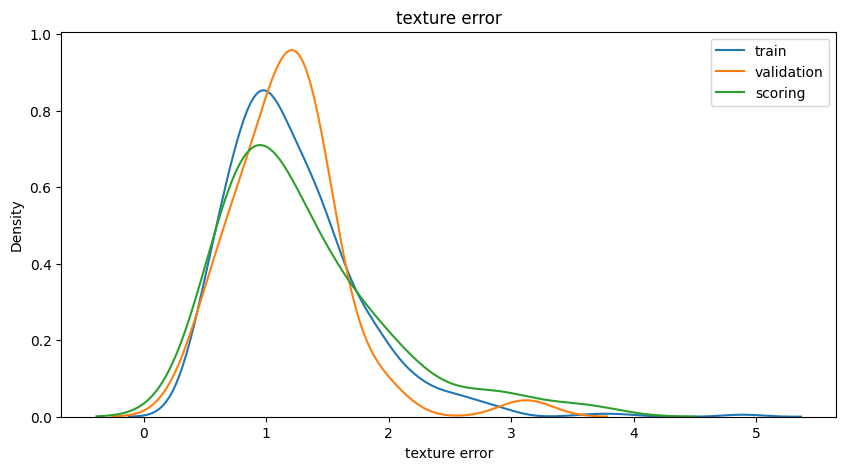

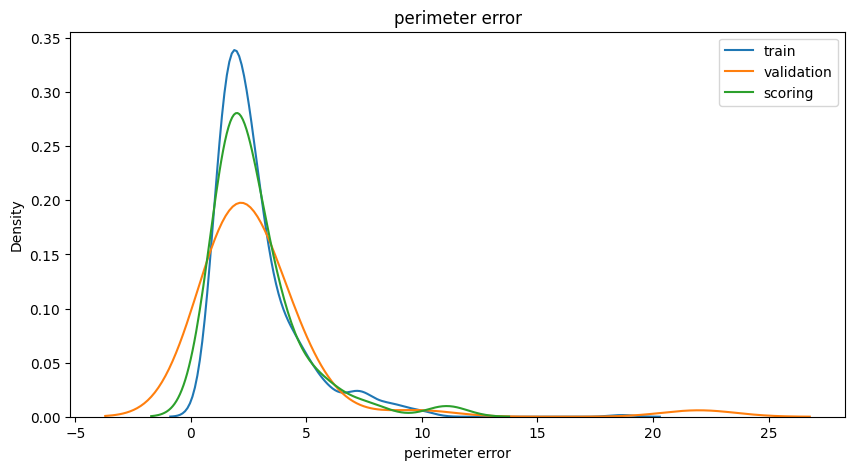

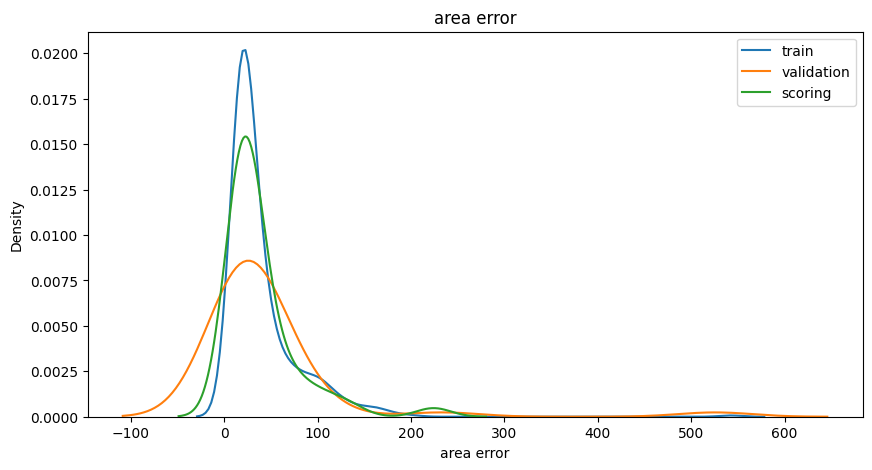

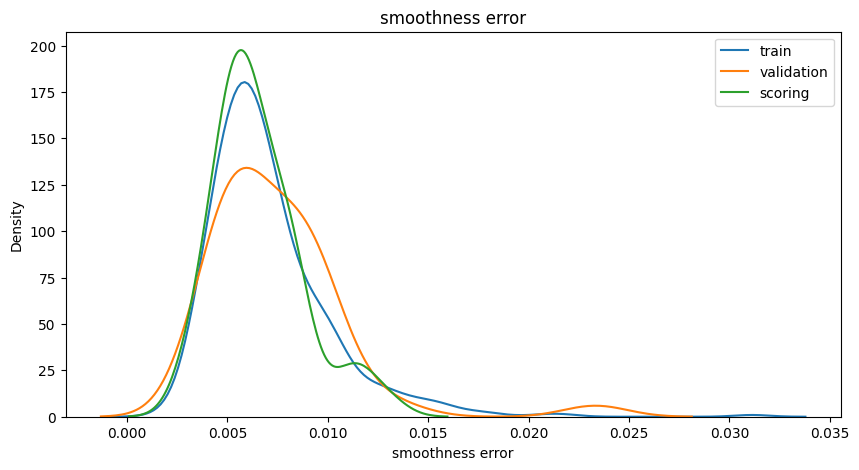

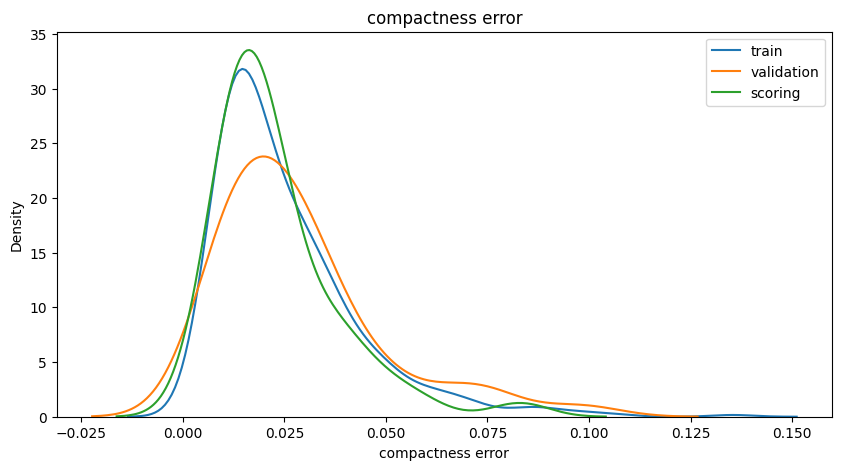

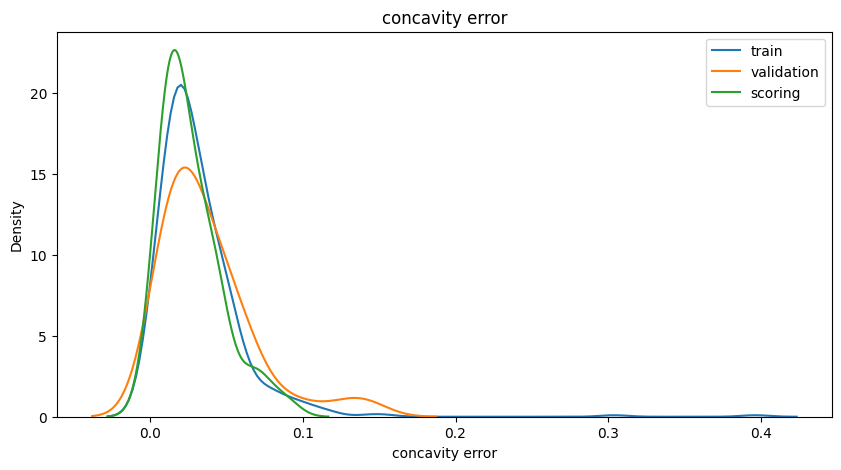

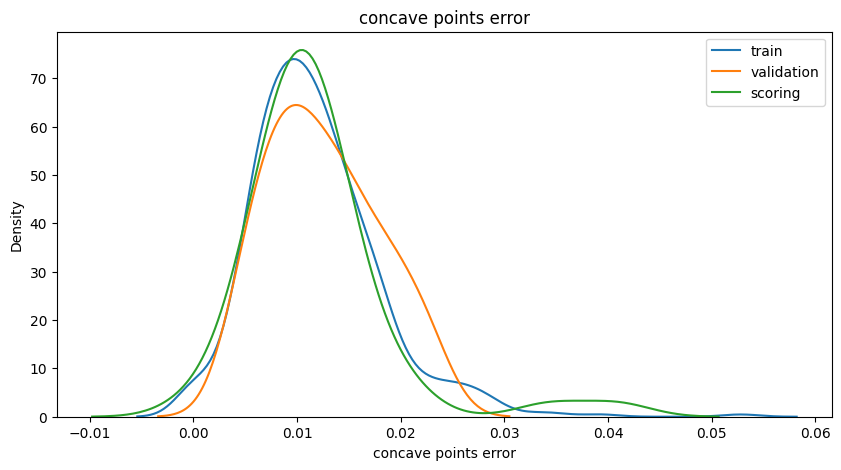

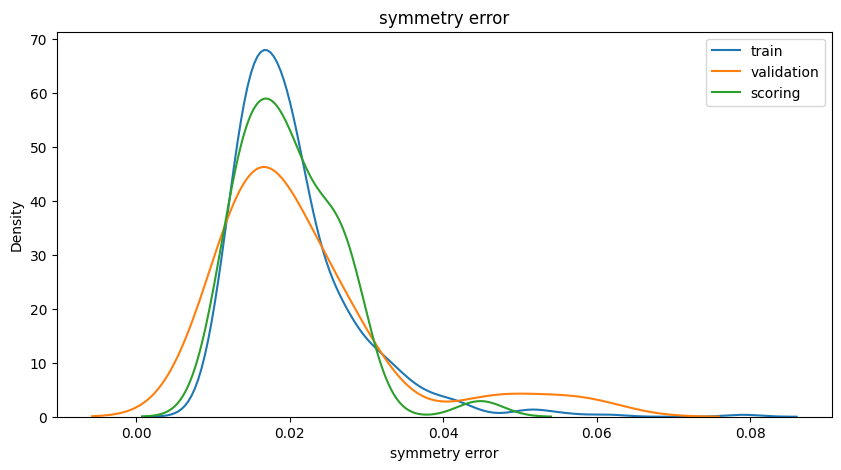

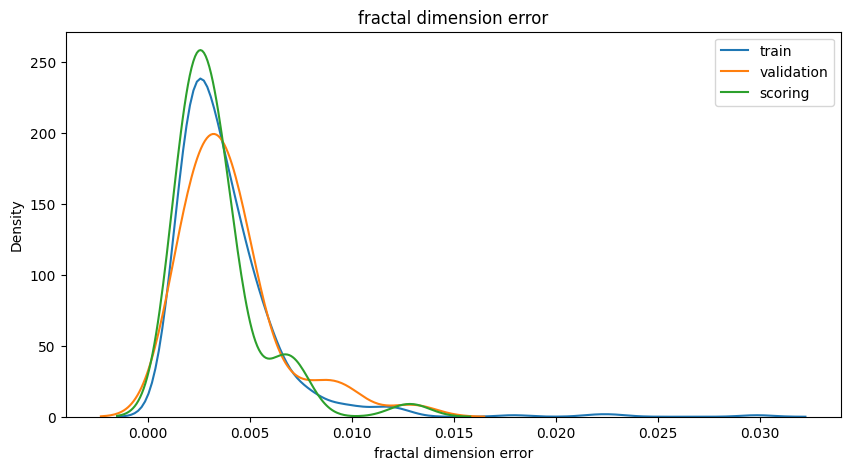

,train_nulls,validation_nulls,scoring_nulls
mean radius,0,0,0
mean texture,0,0,0
mean perimeter,0,0,0
mean area,0,0,0
mean smoothness,0,0,0


In [8]:
data_quality_nulls, data_quality_dtypes  = ml_functions.nulls_per_df(train_df, validation_df, scoring_df, numerical_features)
data_quality_nulls.head()

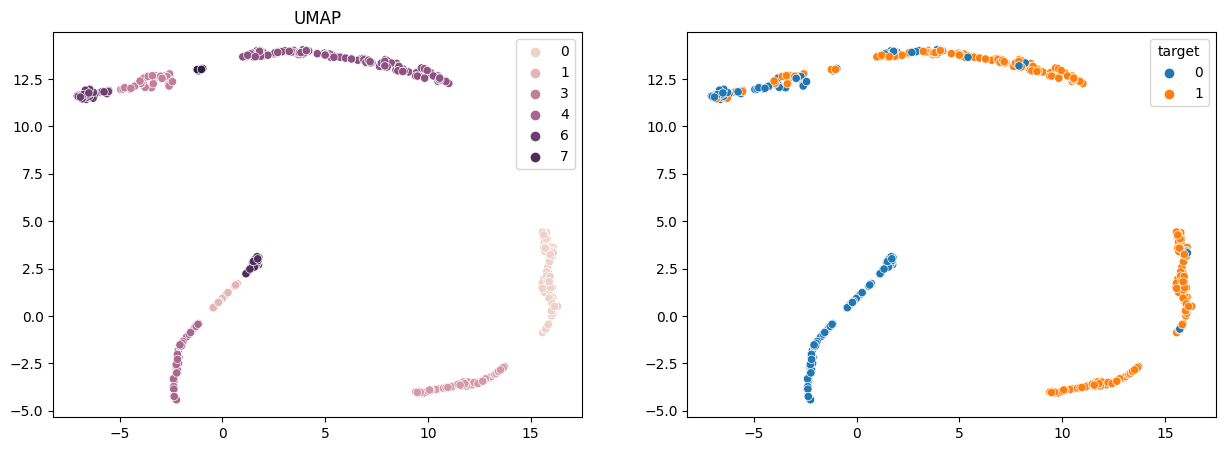

In [9]:
cluster_labels, reduced_data, df_no_outliers = ml_functions.umap_dbscan_outliers(train_df, numerical_features, 15, 5, 0.5)

In [10]:
train_df = ml_functions.replace_outliers_with_nan(df_no_outliers, numerical_features)

train_df.isnull().sum().sort_values(ascending=False)

perimeter error            10
compactness error          10
mean concavity              8
symmetry error              8
fractal dimension error     7
mean compactness            7
radius error                7
mean area                   6
mean fractal dimension      6
texture error               6
area error                  6
smoothness error            6
mean perimeter              5
mean concave points         5
mean radius                 4
concave points error        4
concavity error             4
mean symmetry               4
mean texture                3
mean smoothness             3
worst radius                0
worst texture               0
worst perimeter             0
worst area                  0
worst smoothness            0
worst compactness           0
worst concavity             0
worst concave points        0
worst symmetry              0
worst fractal dimension     0
categorical_column          0
mes                         0
target                      0
dtype: int

mean: 0.986578 (0.014453)
median: 0.986123 (0.013734)
most_frequent: 0.981258 (0.012404)
knn: 0.985731 (0.015957)


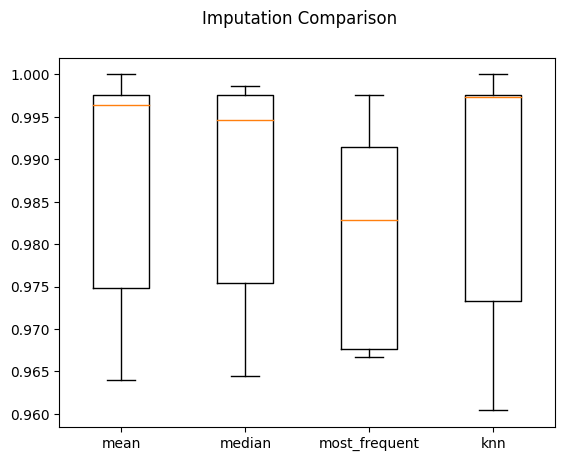

In [11]:
ml_functions.imputation_comparison(train_df, 'target', numerical_features, cv_df, miss_forest=False)

In [12]:
selected_imputer = 'knn'

In [13]:
train_df_imputed = ml_functions.apply_imputation(train_df, numerical_features, selected_imputer)
train_df_imputed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,categorical_column,mes,target
488,11.680,16.17,75.49,420.5,0.1128,0.09263,0.04279,0.031320,0.1853,0.06401,...,549.8,0.1526,0.1477,0.14900,0.09815,0.2804,0.08024,B,201906,1
121,18.660,17.12,121.40,1077.0,0.1054,0.11000,0.14570,0.086650,0.1966,0.06213,...,1549.0,0.1503,0.2291,0.32720,0.16740,0.2894,0.08456,A,201908,0
61,8.598,20.98,54.66,221.8,0.1243,0.08963,0.03000,0.009259,0.1828,0.06757,...,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712,A,201910,1
194,14.860,23.21,100.40,671.4,0.1044,0.19800,0.16970,0.088780,0.1737,0.06672,...,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,B,201908,0
432,20.180,19.54,133.80,1250.0,0.1133,0.14890,0.21330,0.125900,0.1724,0.06053,...,1479.0,0.1665,0.2942,0.53080,0.21730,0.3032,0.08075,A,201904,0


StandardScaler: 0.987644 (0.013762)
MinMaxScaler: 0.985436 (0.016262)
MaxAbsScaler: 0.985418 (0.016033)
RobustScaler: 0.987189 (0.014206)
Normalizer: 0.931569 (0.026708)
PowerTransformer: 0.989642 (0.011107)


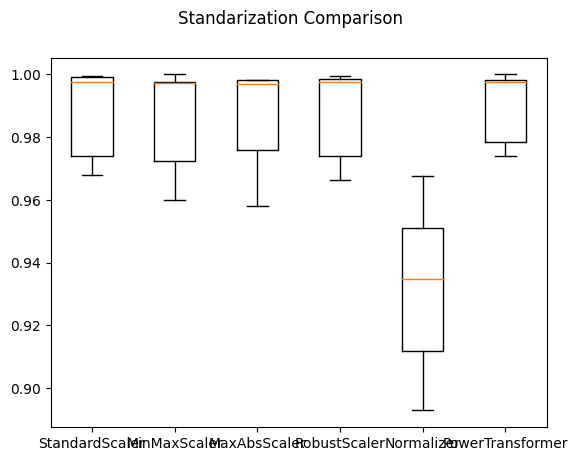

In [14]:
ml_functions.standarization_comparison(train_df_imputed, cv_df, 'target', numerical_features, scoring_metric = 'roc_auc_ovo')

In [15]:
selected_standarization = 'StandardScaler'

onehot:0.495485 (0.044870)
target:0.482000 (0.036000)
binary:0.510155 (0.051889)
ordinal:0.474686 (0.018988)
hashing:0.500377 (0.002825)
helmert:0.503615 (0.047802)
sum:0.503615 (0.047802)
polynomial:0.504514 (0.047937)
backward:0.489580 (0.041165)
base:0.510155 (0.051889)
catboost:0.500000 (0.000000)
james:0.482000 (0.036000)
mestimator:0.482000 (0.036000)
woe:0.482000 (0.036000)
count:0.476590 (0.062315)
leave:0.500000 (0.000000)


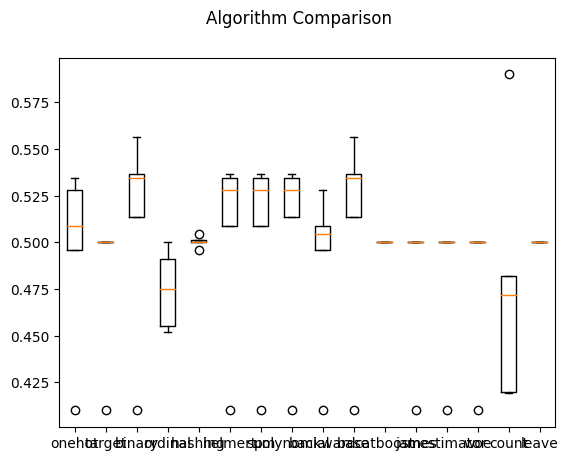

In [16]:
ml_functions.compare_encoders(train_df_imputed, cv_df, 'target', categorical_features, scoring_metric = 'roc_auc_ovo')

In [17]:
selected_encoder = 'binary'

random:0.992295 (0.005111)
smote:0.992539 (0.006352)
adasyn:0.987611 (0.005875)
borderline:0.986542 (0.009629)
svm:0.987140 (0.007550)
kmeans:0.994259 (0.005845)
smotetomek:0.996326 (0.002344)


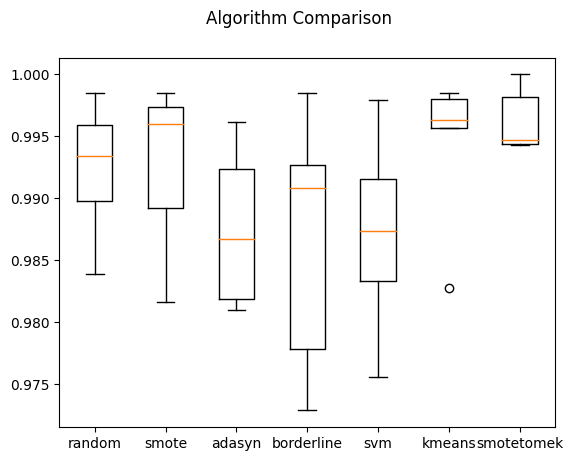

In [18]:
ml_functions.compare_balancing(train_df_imputed, cv_df, 'target', numerical_features, categorical_features, selected_standarization, selected_encoder, metric='roc_auc_ovo')

In [19]:
selected_balancing = 'smotetomek'

In [20]:
X_train, y_train, X_validation, y_validation, X_scoring = ml_functions.data_preparation(train_df_imputed, 'target', validation_df, scoring_df, numerical_features, categorical_features, selected_standarization, selected_encoder, selected_balancing)

Pre-balancing
1    296
0    180
Name: target, dtype: int64
Post-balancing
1    290
0    290
Name: target, dtype: int64


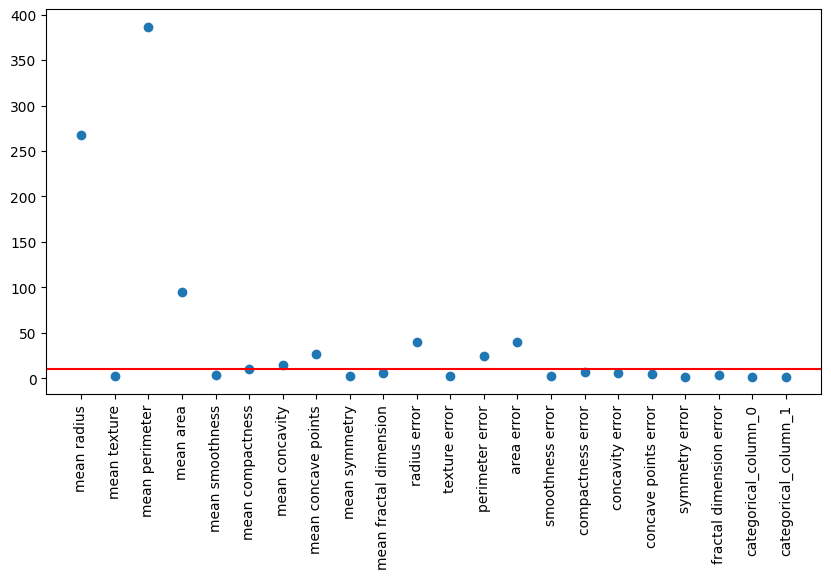

Original data: Lasso AUC score in kfold test:  0.9947919143876338
Original data: Lasso AUC score in validation:  1.0
VIF reduced data: Lasso AUC score in kfold test:  0.9820214030915577
VIF reduced data: Lasso AUC score in validation:  0.9770408163265305
['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error']


In [21]:
selected_features = ml_functions.vif_filter(X_train, y_train, X_validation, y_validation, cv_df, 10)
print(selected_features)
X_train = X_train[selected_features]
X_validation = X_validation[selected_features]
X_scoring = X_scoring[selected_features]

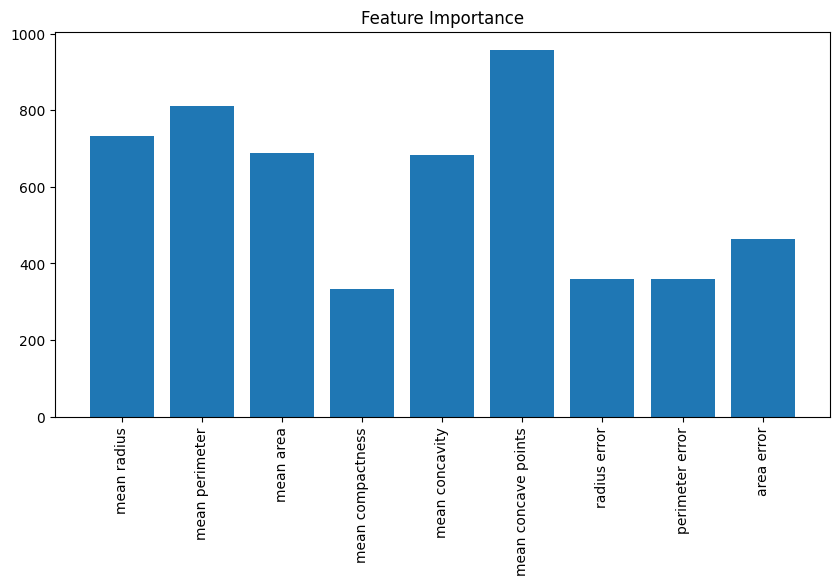

Original data: Lasso AUC score in kfold test:  0.9820214030915577
Original data: Lasso AUC score in validation:  0.9770408163265305
F-Filter reduced data: Lasso AUC score in kfold test:  0.9838763376932224
F-Filter reduced data: Lasso AUC score in validation:  0.9770408163265305


Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points'],
      dtype='object')

In [22]:
selected_features = ml_functions.f_filter(X_train, y_train, X_validation, y_validation, cv_df, k_features = 5)
selected_features

In [23]:
X_train = X_train[selected_features]
X_validation = X_validation[selected_features]
X_scoring = X_scoring[selected_features]

XGB: 0.986670 (0.008503)
LR: 0.983762 (0.007294)
RF: 0.987578 (0.007459)
GBM: 0.983452 (0.011961)
KNN: 0.973663 (0.016195)
NB: 0.982877 (0.009156)
DT: 0.920106 (0.020668)
NN: 0.984307 (0.008095)


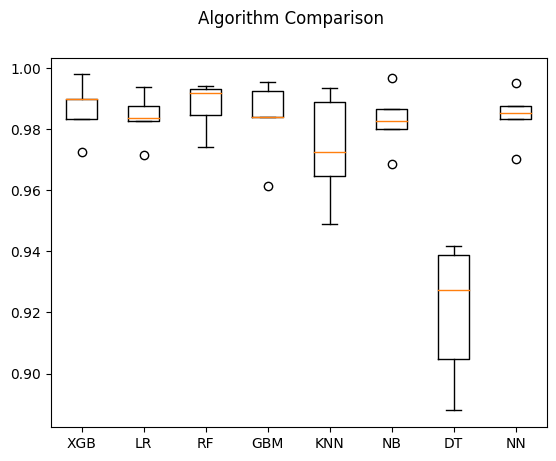

In [24]:
ml_functions.model_comparison(X_train, y_train, cv_df, scoring_metric = 'roc_auc_ovo')

In [25]:
selected_model = 'LR'

In [26]:
model, metrics = ml_functions.model_training(X_train, y_train, X_validation, y_validation, selected_model, 'target', 'roc_auc_ovo', cv_df)

Accuracy: 0.9047619047619048
Precision: 1.0
Recall: 0.8571428571428571
F1: 0.923076923076923
ROC AUC: 0.9285714285714286
Confusion matrix: [[14  0]
 [ 4 24]]
Overfitting: -0.07241379310344831


  0%|          | 0/42 [00:00<?, ?it/s]

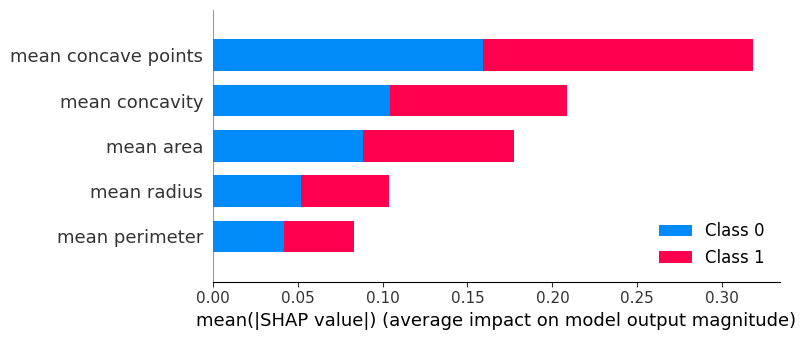

In [27]:
ml_functions.shap_values_importance(model, X_train, X_validation, y_train, y_validation)

In [28]:
ml_functions.precision_threshold(model, X_train, y_train, X_validation, y_validation)

Validation data:
                              TP  Total  Precision  FP   FPR     Value  \
decile                                                                   
(-0.0009999999182, 0.000203]   0      5       0.00   5  1.00  0.000203   
(0.000203, 0.00456]            1      4       0.25   3  0.75  0.004560   
(0.00456, 0.0564]              0      4       0.00   4  1.00  0.056400   
(0.0564, 0.41]                 3      4       0.75   1  0.25  0.410000   
(0.41, 0.923]                  3      4       0.75   1  0.25  0.923000   
(0.923, 0.944]                 4      4       1.00   0  0.00  0.944000   
(0.944, 0.974]                 4      4       1.00   0  0.00  0.974000   
(0.974, 0.987]                 4      4       1.00   0  0.00  0.987000   
(0.987, 0.994]                 4      4       1.00   0  0.00  0.994000   
(0.994, 0.997]                 5      5       1.00   0  0.00  0.997000   

                              Count_0  Count_1    Perc_0    Perc_1  
decile                   

In [29]:
low_threshold = 0.559
high_threshold = 0.89

In [30]:
predictions = ml_functions.model_predictions(model, X_scoring, low_threshold, high_threshold)
predictions.head()

,prediction,probability
0,NaN,0.856462
1,1.0,0.990105
2,0.0,0.003575
3,1.0,0.999469
4,0.0,0.401753


In [31]:
predictions[predictions['prediction'].isnull()]

,prediction,probability
0,NaN,0.856462
5,NaN,0.841889
11,NaN,0.675863
18,NaN,0.756329
32,NaN,0.725269
34,NaN,0.802186
36,NaN,0.844666


### Piloto - Control

In [32]:
X_scoring.head()

,mean radius,mean perimeter,mean area,mean concavity,mean concave points,pred_prob,pred
0,-0.126709,-0.178148,-0.218631,-0.536448,-0.286302,0.856462,NaN
1,-0.800981,-0.822011,-0.766193,-0.809446,-0.732154,0.990105,1.0
2,1.511653,1.556692,1.568200,0.377569,0.544988,0.003575,0.0
3,-1.498911,-1.519493,-1.245115,-1.152455,-1.211301,0.999469,1.0
4,0.819637,0.730783,0.732660,-0.473241,-0.548729,0.401753,0.0


In [33]:
effect_numerical_features = ['mean radius', 'mean perimeter']
piloto_df, piloto_control_means = ml_functions.piloto_control(X_scoring, predictions, effect_numerical_features)
piloto_df.head()
piloto_control_means.head()

,piloto_control,mean_probability,mean radius,mean perimeter
0,control,0.558956,-0.027187,-0.021228
1,piloto,0.604622,0.009297,0.012796


### Histórico de versiones

In [34]:
ml_functions.save_model_metrics('Modelo de Churn para Mayorista', '2.0', metrics, 'Modelo de Churn para Mayorista', selected_imputer, selected_encoder, selected_balancing, selected_features, selected_model)

Modelo guardado en el excel


### Pipeline

- Llevar el código al pipeline y dejar funcionando el modelo

### Versionado en CodeCommit

- git status
- git stash
- git pull
- git stash pop
- git add .
- git commit -m "Feat (sprint_1): add classification baseline"
- git push
- git tag -a v0.1.0 -m "Feat (sprint_1): add classification baseline"
- git push origin v0.1.0
- git stash pop

### Presentación al stakeholder técnico

Se revisarán los temas:
- Modelo funcionando en todos los items del sprint 1
- Documentación completa y clara
- Código limpio y bien comentado
- Buenas prácticas de programación
- Lógica de las variables más importantes
- Versionado en CodeCommit
- Buenas prácticas de Git
- Buenas prácticas de AWS(Instancias, roles, etc)
- Métricas del modelo
- Calidad de los datos
- EDA
- Análisis de outliers
- Análisis de missing values
- Análisis de variables categóricas
- Análisis de variables numéricas
- Regularización
- Feature engineering
- Feature selection
- Entendimiento del problema
- Entendimiento de los datos
- Nombramiento correcto de variables
- Ventana de tiempo correcta
- Correcta creación de variable target
- Correcta creación de variables explicativas
- Explicación de las variables más importantes
- Explicación de las métricas del modelo
- Explicación de las métodologías seleccionadas
- Explicación de las decisiones tomadas
- Explicación de las nuevas varibles a incorporar
- Overfitting
- Pipeline de MLops

### Escritura de la documentación

- Documentación del modelo sobre la estructura del archivo 'README.md'